# SF Home Prices
### Here is a practice notebook for looking at Redfin SF home prices and trying to get an idea of prices and sales
**Data**<br>
The data has been pulled from Redfin using their tabluar data and downladed as a .csv.  I'm pulling down data every month to look at the current market and compare it to the past three months of sales.  I also want to look at how much over asking (or under?) that a home goes for.<br><br>
I'm looking at a filter of the data less than 1.25M and at least 3br 2ba homes in and around San Francisco.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data from Redfin 08/01/2021 with current listed prices and sold prices from the last 3 months
data = pd.read_csv('Data/redfin_2021-08-01-12-21-52.csv')

In [3]:
data.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,2986 Bella Dr,Concord,CA,94519,729000,3,2.5,...,Active,August-1-2021 02:00 PM,August-1-2021 04:00 PM,http://www.redfin.com/CA/Concord/2986-Bella-Dr...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40961231,N,Y,37.974726,-122.023066
1,MLS Listing,NaN,Single Family Residential,4747 Cunningham St,Oakland,CA,94619,849000,3,2.0,...,Active,August-1-2021 02:00 PM,August-1-2021 04:00 PM,http://www.redfin.com/CA/Oakland/4747-Cunningh...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40961227,N,Y,37.786508,-122.182077
2,MLS Listing,NaN,Single Family Residential,14940 Riverdale St,San Leandro,CA,94578,799000,3,2.5,...,Active,August-1-2021 01:00 PM,August-1-2021 04:00 PM,http://www.redfin.com/CA/San-Leandro/14940-Riv...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40960879,N,Y,37.693961,-122.135551
3,MLS Listing,NaN,Single Family Residential,5366 Leona St,Oakland,CA,94619,995000,4,3.0,...,Active,August-1-2021 02:00 PM,August-1-2021 04:00 PM,http://www.redfin.com/CA/Oakland/5366-Leona-St...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40961188,N,Y,37.786440,-122.175204
4,MLS Listing,NaN,Single Family Residential,1833 Leo Ln,Concord,CA,94521,949000,4,2.0,...,Active,NaN,NaN,http://www.redfin.com/CA/Concord/1833-Leo-Ln-9...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40961152,N,Y,37.959092,-121.952399


In [5]:
# Double checking that there aren't any duplicates on the MLS#
data['MLS#'].duplicated().sum()

0

In [6]:
# Data from Redfin 08/30/2021 with current listed prices and sold prices from the last 3 months
data1 = pd.read_csv('Data/redfin_2021-08-30-18-45-46.csv')

In [7]:
data1.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,879 Estuary St,Richmond,CA,94804,989000.0,3.0,3.5,...,Active,NaN,NaN,http://www.redfin.com/CA/Richmond/879-Estuary-...,BAREIS,321080922,N,Y,37.919952,-122.354761
1,PAST SALE,July-30-2021,Single Family Residential,2316 Kristie Ln,South San Francisco,CA,94080,1250000.0,3.0,2.5,...,Sold,NaN,NaN,http://www.redfin.com/CA/South-San-Francisco/2...,San Francisco MLS,421564911,N,Y,37.645896,-122.456814
2,PAST SALE,August-27-2021,Single Family Residential,3620 Sunset Dr,SAN BRUNO,CA,94066,1250000.0,3.0,2.0,...,Sold,NaN,NaN,http://www.redfin.com/CA/San-Bruno/3620-Sunset...,MLSListings,ML81853753,N,Y,37.632812,-122.471779
3,PAST SALE,August-27-2021,Single Family Residential,8 Weiss Ct,Alameda,CA,94501,1250000.0,4.0,2.5,...,Sold,NaN,NaN,http://www.redfin.com/CA/Alameda/8-Weiss-Ct-94...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40960067,N,Y,37.780310,-122.273076
4,MLS Listing,NaN,Single Family Residential,888 Ingerson Ave,SAN FRANCISCO,CA,94124,925000.0,5.0,3.0,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/888-Ing...,MLSListings,ML81858664,N,Y,37.718050,-122.390739


In [30]:
# Make a separate column for data that is sales price vs asking price
data.iloc[0:10]['SALE TYPE']!='MLS Listing'

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: SALE TYPE, dtype: bool

In [46]:
MLS_1= data[['SOLD DATE','ADDRESS','CITY','MLS#','PRICE']]
MLS_1.head()

,SOLD DATE,ADDRESS,CITY,MLS#,PRICE
0,NaN,2986 Bella Dr,Concord,40961231,729000
1,NaN,4747 Cunningham St,Oakland,40961227,849000
2,NaN,14940 Riverdale St,San Leandro,40960879,799000
3,NaN,5366 Leona St,Oakland,40961188,995000
4,NaN,1833 Leo Ln,Concord,40961152,949000


In [48]:
MLS_2= data1[['SOLD DATE','MLS#','PRICE']]
MLS_2.head()

,SOLD DATE,MLS#,PRICE
0,NaN,321080922,989000.0
1,July-30-2021,421564911,1250000.0
2,August-27-2021,ML81853753,1250000.0
3,August-27-2021,40960067,1250000.0
4,NaN,ML81858664,925000.0


In [62]:
df=MLS_1.merge(MLS_2, on=['MLS#', 'SOLD DATE'], how='outer')
df

,SOLD DATE,ADDRESS,CITY,MLS#,PRICE_x,PRICE_y
0,NaN,2986 Bella Dr,Concord,40961231,729000.0,NaN
1,NaN,4747 Cunningham St,Oakland,40961227,849000.0,NaN
2,NaN,14940 Riverdale St,San Leandro,40960879,799000.0,NaN
3,NaN,5366 Leona St,Oakland,40961188,995000.0,NaN
4,NaN,1833 Leo Ln,Concord,40961152,949000.0,NaN
...,...,...,...,...,...,...
629,July-12-2021,NaN,NaN,515511,NaN,1250000.0
630,June-4-2021,NaN,NaN,421546367,NaN,1000000.0
631,June-24-2021,NaN,NaN,321037221,NaN,551000.0
632,July-2-2021,NaN,NaN,421563548,NaN,925000.0


In [65]:
df['OVER ASKING']=df['PRICE_y']-df['PRICE_x']

In [66]:
df

,SOLD DATE,ADDRESS,CITY,MLS#,PRICE_x,PRICE_y,OVER ASKING
0,NaN,2986 Bella Dr,Concord,40961231,729000.0,NaN,NaN
1,NaN,4747 Cunningham St,Oakland,40961227,849000.0,NaN,NaN
2,NaN,14940 Riverdale St,San Leandro,40960879,799000.0,NaN,NaN
3,NaN,5366 Leona St,Oakland,40961188,995000.0,NaN,NaN
4,NaN,1833 Leo Ln,Concord,40961152,949000.0,NaN,NaN
...,...,...,...,...,...,...,...
629,July-12-2021,NaN,NaN,515511,NaN,1250000.0,NaN
630,June-4-2021,NaN,NaN,421546367,NaN,1000000.0,NaN
631,June-24-2021,NaN,NaN,321037221,NaN,551000.0,NaN
632,July-2-2021,NaN,NaN,421563548,NaN,925000.0,NaN


In [67]:
df.describe()

,PRICE_x,PRICE_y,OVER ASKING
count,3.500000e+02,2.920000e+02,9.0
mean,9.368999e+05,1.019911e+06,6000.0
std,1.934850e+05,1.897702e+05,18000.0
min,4.999500e+05,3.660000e+05,0.0
25%,7.890000e+05,9.164992e+05,0.0
50%,9.489000e+05,1.057500e+06,0.0
75%,1.099000e+06,1.181250e+06,0.0
max,1.250000e+06,1.250000e+06,54000.0


<AxesSubplot:ylabel='Frequency'>

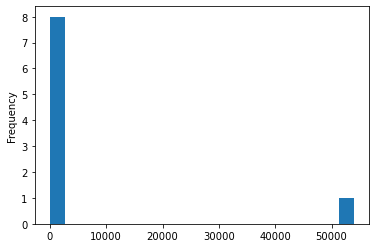

In [81]:
# The issue here is some data is the same in both... So I need only the data that changes from one to another. 
# I need to only look at asking vs sold not data vs data1 prices
df['OVER ASKING'].plot.hist(bins=20)

<AxesSubplot:ylabel='Density'>

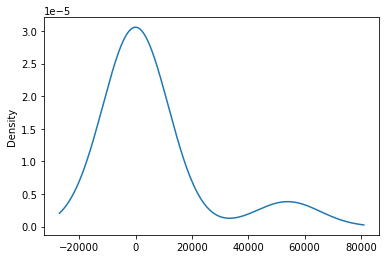

In [77]:
df['OVER ASKING'].plot.kde()